In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#在notebook中显示数据点
%matplotlib inline

In [3]:
#index_col=0 --->将第一行设为ID行
df = pd.read_csv('Pokemon.csv',index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


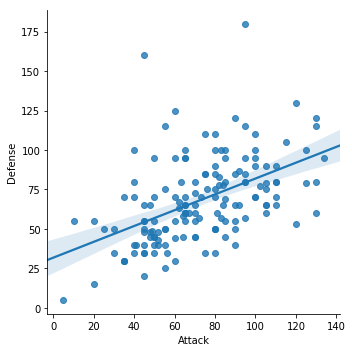

In [14]:
#绘制散点图
sns.lmplot(data=df,x='Attack',y="Defense")

我们可以通过设置函数的参数来得到我们想要的散点图。用fit_reg = False 移去回归线，用hug参数来用不同颜色显示Pokemon进化阶段的信息。

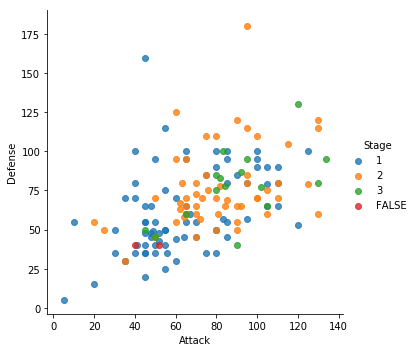

In [10]:
#移去回归线，用不同颜色来表示Pokemon的进化阶段
sns.lmplot(data=df,x='Attack',y='Defense',
          fit_reg=False,
          hue='Stage')

(0, 141.9881096001028)

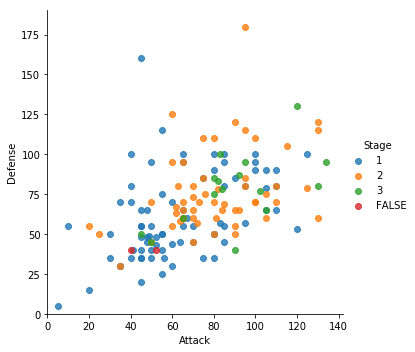

In [19]:
#设置x,y轴
sns.lmplot(data=df,x='Attack',y='Defense',
          fit_reg=False,
          hue='Stage')
plt.ylim(0,None)
plt.xlim(0,None)

### Step 5：Pandas的作用

根据Pokemon的攻击数据来绘制箱形图。 

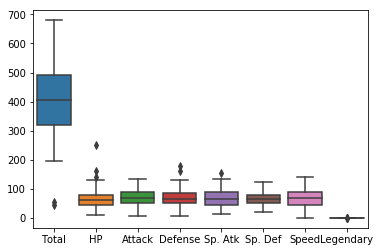

In [25]:
#Boxplot
sns.boxplot(data=df)

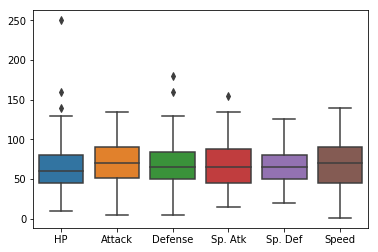

In [27]:
# 移除掉Total，因为我们有独立的统计数据。
# 移除掉Stage跟Legendary，因为它们不是攻击统计数据。
# 我们可以创建一个新的数据集stats_df，满足我们上述的要求。 

stats_df = df.drop(['Total','Stage','Legendary'],axis=1)

#Boxplot
sns.boxplot(data=stats_df)

### Step 6： Seaborn 主题

其默认的主题为“darkgrid”

下一步，我们把主题改为“whitegrid”来创建一个小提琴图

小提琴图常常作为箱形图的替代
小提琴图通过小提琴的厚度展示了数据的分布，而不仅仅是总结数据。

根据Pokemon的主要类型，我们可以将Attack数据的分布可视化。 

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


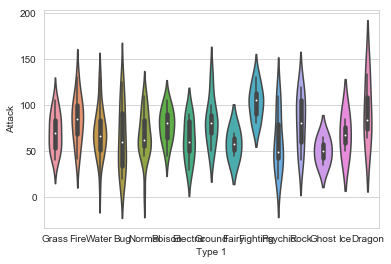

In [33]:
#设置主题
sns.set_style('whitegrid')

#violin plot
sns.violinplot(x='Type 1',y='Attack',data=df)

### Step 7： 调色盘

我们可以创建一个python命令列表，用颜色的十六进制数值来设置。数值可以在Bulbapedia中寻找。

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


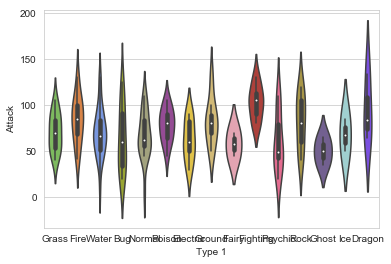

In [36]:
#创建颜色列表
pkmn_type_colors = ['#78C850',#Grass
                   '#F08030',#Fire
                   '#6890F0',#Water
                   '#A8B820',#Bug
                   '#A8A878',#Normal
                   '#A040A0',#Poison
                   '#F8D030',#Electric
                   '#E0C068',#Ground
                   '#EE99AC',#Fairy
                   '#C03028',#Fighting
                   '#F85888',#Psychic
                   '#B8A038',#Rock
                   '#705898',#Ghost
                   '#98D8D8',#Ice
                   '#7038F8',#Dragon
                   ]
#导入小提琴图中
sns.violinplot(data=df,x='Type 1',y='Attack',
              palette=pkmn_type_colors)
                    

为了能够让数据文件中的151个Pokemon都能够在图中简单展示，我们可以用群集图 swarm plot达到这一目的。 

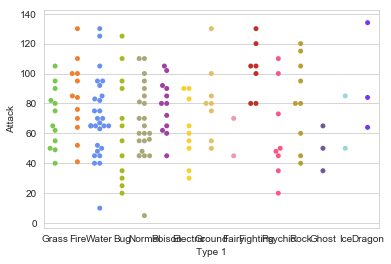

In [40]:
#创建swarm plot
sns.swarmplot(data=df,x='Type 1',y='Attack',
             palette=pkmn_type_colors)

### Step 8： 图形重叠

首先，我们用Matplotlib设置图形比例。

然后，我们绘制小提琴图，用inner = None将小提琴中间的木杆移去。

接着，我们绘制群集图，并将数据点的颜色变为黑色。

最后，我们可以用Matplotlib设置一个标题。

Text(0.5,1,'Attack by Type')

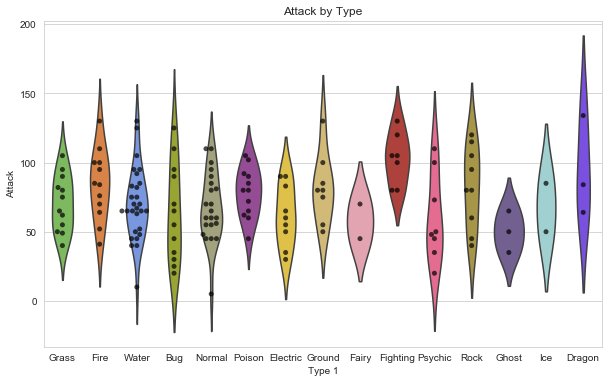

In [53]:
#设置图形比例
plt.figure(figsize=(10,6))

#创建violin plot
sns.violinplot(data=df,x='Type 1',y='Attack',
              inner=None,
              palette=pkmn_type_colors)

#创建swarm plot
sns.swarmplot(data=df,x='Type 1',y='Attack',
             color='k',
             alpha=0.7)

#设置标题
plt.title('Attack by Type')

### Step 9： 融合数据

我们可以利用pandas的melt()函数来将一些数据进行融合，这样就可以在不同Pokemon之间直接进行比对，melt()需要导入3个参数，分别为：

需要融合的数据列表

需要保留的ID变量，其他变量将会被Pandas融合。

融合而成的新变量的名字。

In [60]:
#数据融合
melted_df = pd.melt(stats_df,
                   id_vars=['Name','Type 1','Type 2'],
                   var_name='Stat')
#显示前五行
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


<Figure size 720x360 with 0 Axes>

我们为已经融合的数据列表melted_df绘制群集图。 

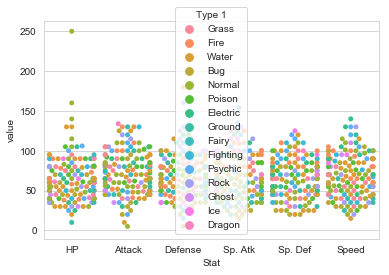

In [63]:
#数据融合
melted_df = pd.melt(stats_df,
                   id_vars=['Name','Type 1','Type 2'],
                   var_name='Stat')
#显示前五行
melted_df.head()

#绘制群集图
sns.swarmplot(data=melted_df,x='Stat',y='value',
             hue='Type 1')

这张图表有一些细节需要完善：

扩大图表。

使用split = True 来分隔色调。

使用我们自定义的颜色。

调整y轴的范围

将图例放在右侧。 

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


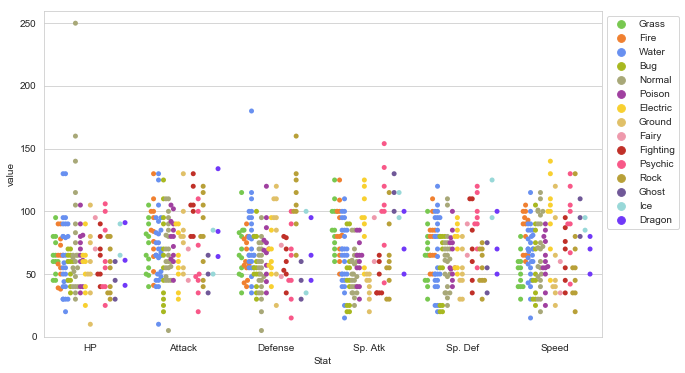

In [72]:
#扩大图表
plt.figure(figsize=(10,6))
#绘制群集图，使用split=True来分隔色调，使用我们自定义的颜色
sns.swarmplot(data=melted_df,x='Stat',y='value',
             hue='Type 1',
             split=True,
             palette=pkmn_type_colors)

#调整y轴的范围
plt.ylim(0,260)

#将图例放在右侧
plt.legend(bbox_to_anchor=(1,1),loc=2)

### Step 10： 迷你画廊

10.1-Heatmap 
Heatmap可以帮助可视化矩阵状的数据。 

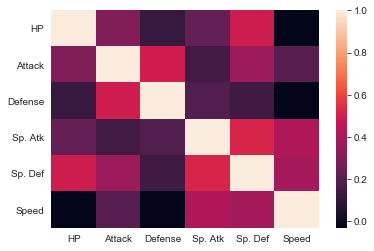

In [75]:
#计算相关性
corr = stats_df.corr()

#Heatmap
sns.heatmap(corr)

10.2-Histogram 
Histogram能够绘制变量的数值分布。 

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


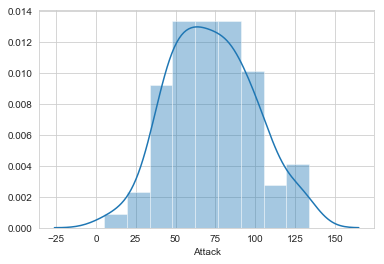

In [77]:
#绘制直方图
sns.distplot(df.Attack)

10.3-Bar Plot 
条形图可以帮助分类变量的可视化。 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

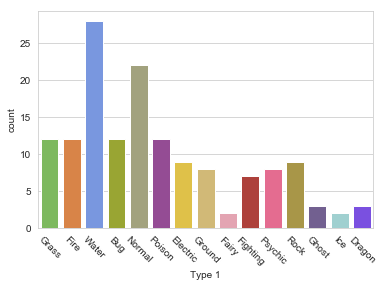

In [79]:
#绘制条形图
sns.countplot(data=df,x='Type 1',palette=pkmn_type_colors)

#倾斜x轴的标签
plt.xticks(rotation=-45)

10.4-Factor Plot 
Factor plots能够根据类别分离图表。 

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


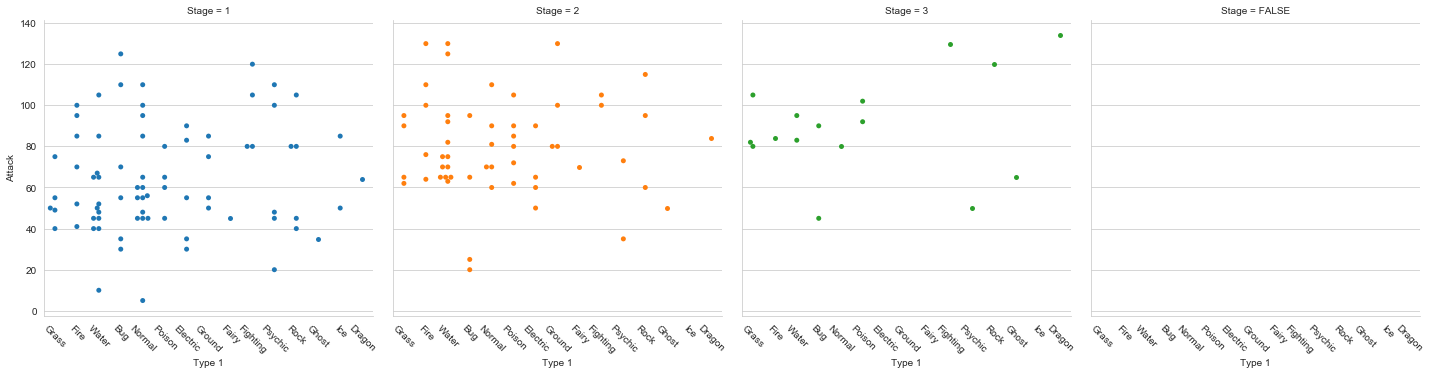

In [82]:
#分离图表
g = sns.factorplot(x='Type 1',
                  y='Attack',
                  data=df,
                  hue='Stage',#用不同的颜色表示Stage
                  col='Stage',#根据Stage来分离图表
                  kind='swarm')#创建群集图

#设置斜x轴标签
g.set_xticklabels(rotation=-45)

10.5-Density Plot 
密度图显示的是两个变量之间的分布。 

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


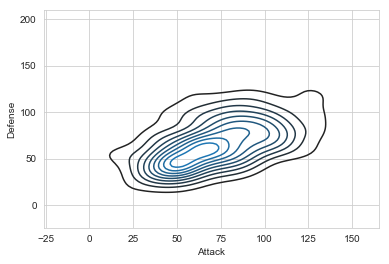

In [85]:
#创建密度图
sns.kdeplot(df.Attack,df.Defense)

10.6-Joint Distribution Plot 
联合分布图将散点图和直方图的信息结合起来，提供双变量分布的详细信息。 

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


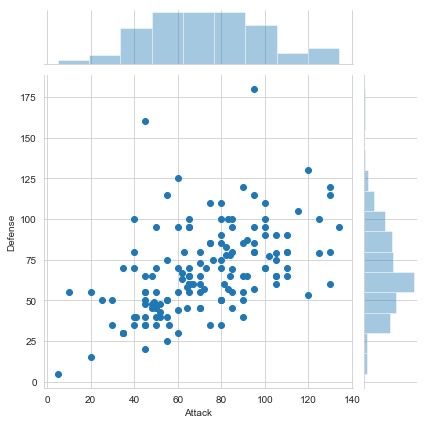

In [87]:
#创建联合分布图
sns.jointplot(data=df,x='Attack',y='Defense')